In [1]:
import pandas as ps
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
datos = ps.read_csv("rezagoslp.csv")
datos

,Municipio,Poblacion,p15a,p6a14noe,p15ymbin,psiss,vipt,visexsa,visagen,visidr,visee,visila,visire,Rezago,clasificacion
0,Ahualulco,"18,974",8.0,5.2,39.7,20.1,8.4,8.1,16.2,11.4,2.7,32.5,14.5,Bajo,2
1,Alaquines,"7,785",11.2,5.0,50.4,15.0,7.2,2.8,28.6,33.7,2.7,28.7,22.1,Medio,3
2,Aquismon,"48,359",15.3,5.6,49.0,22.3,20.0,4.3,27.3,47.2,7.8,76.0,56.7,Alto,4
3,Armadillo de los Infante,"4,013",10.4,16.8,57.4,14.6,3.5,5.2,13.9,14.9,3.3,36.0,18.1,Medio,3
4,Cardenas,"18,317",5.7,5.6,35.1,23.4,6.6,1.2,6.9,7.4,1.9,19.2,12.6,Bajo,2
5,Catorce,"9,579",10.1,6.4,42.6,10.4,7.5,5.9,19.4,13.5,3.7,35.6,22.5,Medio,3
6,Cedral,"19,840",6.0,3.6,33.7,13.9,2.8,1.9,5.3,3.4,1.1,18.7,10.0,Muy bajo,1
7,Cerritos,"22,075",5.4,4.7,38.1,21.0,3.4,0.8,5.1,16.8,1.4,16.1,10.0,Bajo,2
8,Cerro de San Pedro,"5,050",4.4,3.5,28.4,15.6,3.9,2.6,5.2,7.1,2.9,19.6,10.7,Muy bajo,1
9,Ciudad del Maiz,"30,320",7.4,5.4,43.1,13.8,5.6,1.8,17.7,21.2,1.8,20.1,14.9,Bajo,2


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Municipio      58 non-null     object 
 1   Poblacion      58 non-null     object 
 2   p15a           58 non-null     float64
 3   p6a14noe       58 non-null     float64
 4   p15ymbin       58 non-null     float64
 5   psiss          58 non-null     float64
 6   vipt           58 non-null     float64
 7   visexsa        58 non-null     float64
 8   visagen        58 non-null     float64
 9   visidr         58 non-null     float64
 10  visee          58 non-null     float64
 11  visila         58 non-null     float64
 12  visire         58 non-null     float64
 13  Rezago         58 non-null     object 
 14  clasificacion  58 non-null     int64  
dtypes: float64(11), int64(1), object(3)
memory usage: 6.9+ KB


In [4]:
# Ver cuantos hay de cada clase
print(datos.groupby('clasificacion').size())

clasificacion
1     8
2    29
3    15
4     5
5     1
dtype: int64


<AxesSubplot:>

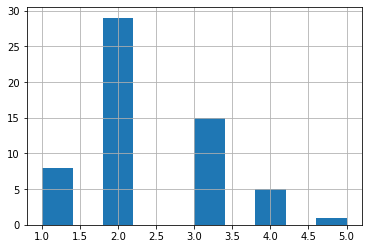

In [5]:
# Ver histograma
datos.clasificacion.hist()

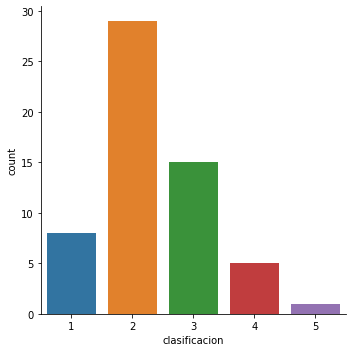

In [6]:
sb.catplot(x='clasificacion', data=datos, kind="count")

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
datos2 = datos[['p15a','p6a14noe','p15ymbin','psiss','vipt','visexsa','visagen','visidr','visee','visila','visire','clasificacion']]
datos2

,p15a,p6a14noe,p15ymbin,psiss,vipt,visexsa,visagen,visidr,visee,visila,visire,clasificacion
0,8.0,5.2,39.7,20.1,8.4,8.1,16.2,11.4,2.7,32.5,14.5,2
1,11.2,5.0,50.4,15.0,7.2,2.8,28.6,33.7,2.7,28.7,22.1,3
2,15.3,5.6,49.0,22.3,20.0,4.3,27.3,47.2,7.8,76.0,56.7,4
3,10.4,16.8,57.4,14.6,3.5,5.2,13.9,14.9,3.3,36.0,18.1,3
4,5.7,5.6,35.1,23.4,6.6,1.2,6.9,7.4,1.9,19.2,12.6,2
5,10.1,6.4,42.6,10.4,7.5,5.9,19.4,13.5,3.7,35.6,22.5,3
6,6.0,3.6,33.7,13.9,2.8,1.9,5.3,3.4,1.1,18.7,10.0,1
7,5.4,4.7,38.1,21.0,3.4,0.8,5.1,16.8,1.4,16.1,10.0,2
8,4.4,3.5,28.4,15.6,3.9,2.6,5.2,7.1,2.9,19.6,10.7,1
9,7.4,5.4,43.1,13.8,5.6,1.8,17.7,21.2,1.8,20.1,14.9,2


In [9]:
X_train, X_test = train_test_split(datos2,test_size=0.3,random_state=42)

In [10]:
y_train = X_train['clasificacion']
y_test = X_test['clasificacion']

In [11]:
X_train = X_train[['p15a','p6a14noe','p15ymbin','psiss','vipt','visexsa','visagen','visidr','visee','visila','visire']]
X_train

,p15a,p6a14noe,p15ymbin,psiss,vipt,visexsa,visagen,visidr,visee,visila,visire
41,9.6,3.0,34.3,23.6,8.2,1.8,4.2,11.2,1.9,38.6,13.7
19,3.6,3.9,26.9,16.3,1.5,0.6,6.2,5.8,0.7,12.9,5.1
30,21.7,8.1,60.7,6.4,11.1,11.0,48.5,59.7,8.2,60.9,44.9
49,6.6,4.9,40.7,16.6,6.5,6.3,4.2,7.2,1.2,29.6,12.1
50,7.1,4.7,42.3,19.6,2.4,4.0,11.2,10.1,1.8,22.0,11.6
54,10.2,5.9,41.2,17.8,6.8,6.4,10.1,10.5,1.3,23.9,16.6
15,6.5,4.8,36.1,19.6,4.3,1.4,5.5,21.7,1.5,23.1,13.0
9,7.4,5.4,43.1,13.8,5.6,1.8,17.7,21.2,1.8,20.1,14.9
27,1.8,4.9,18.6,17.5,1.3,0.5,1.6,0.7,0.3,13.4,4.3
26,9.3,7.2,46.6,17.1,6.0,3.2,5.5,7.4,2.2,21.9,13.8


In [12]:
estandariza = StandardScaler()

In [13]:
X_train = estandariza.fit_transform(X_train)
X_train

array([[ 1.68901463e-01, -1.41653904e+00, -9.49807982e-01,
         1.55957743e+00,  4.87185282e-02, -6.27437167e-01,
        -7.91969285e-01, -5.76472133e-01, -4.14821980e-01,
         1.97986708e-01, -4.95217945e-01],
       [-1.48564348e+00, -8.13756471e-01, -1.83585640e+00,
        -5.93227106e-02, -1.12754864e+00, -9.92049564e-01,
        -6.29221937e-01, -9.51978710e-01, -1.10619195e+00,
        -1.07646749e+00, -1.20003786e+00],
       [ 3.50556711e+00,  1.99922886e+00,  2.21122961e+00,
        -2.25481742e+00,  5.57849093e-01,  2.16792454e+00,
         2.81288449e+00,  2.79613323e+00,  3.21487035e+00,
         1.30383607e+00,  2.06180313e+00],
       [-6.58371010e-01, -1.43998059e-01, -1.83495838e-01,
         7.20743213e-03, -2.49737320e-01,  7.39859323e-01,
        -7.91969285e-01, -8.54625153e-01, -8.18121128e-01,
        -2.48320211e-01, -6.26347231e-01],
       [-5.20492265e-01, -2.77949741e-01,  8.08219840e-03,
         6.72508860e-01, -9.69542602e-01,  4.10188947e-02,
  

In [14]:
X_test = X_test[['p15a','p6a14noe','p15ymbin','psiss','vipt','visexsa','visagen','visidr','visee','visila','visire']]
X_test

,p15a,p6a14noe,p15ymbin,psiss,vipt,visexsa,visagen,visidr,visee,visila,visire
0,8.0,5.2,39.7,20.1,8.4,8.1,16.2,11.4,2.7,32.5,14.5
5,10.1,6.4,42.6,10.4,7.5,5.9,19.4,13.5,3.7,35.6,22.5
34,1.8,4.2,19.1,16.6,1.0,0.4,0.8,0.4,0.3,14.1,4.6
13,9.4,2.9,40.9,14.0,12.7,1.9,35.6,49.4,4.2,76.6,35.8
44,8.8,3.6,43.5,26.2,3.3,4.8,11.7,8.3,4.9,31.8,17.4
52,6.6,2.8,33.7,13.1,13.6,1.1,7.1,22.7,1.7,57.5,22.6
37,10.1,3.3,33.6,7.8,20.0,2.1,30.1,27.3,2.7,63.2,25.6
25,10.1,2.4,38.9,13.1,12.2,5.4,22.1,43.5,5.0,85.7,44.2
46,11.9,4.8,53.5,16.2,5.6,3.6,31.5,29.4,2.5,25.7,13.9
12,4.2,3.3,24.9,19.5,6.1,1.4,3.2,6.0,1.7,24.7,9.5


In [15]:
X_test = estandariza.fit_transform(X_test)
X_test

array([[ 0.0084841 ,  0.04158777,  0.09946311,  0.92880245,  0.06162306,
         1.65302931,  0.08452459, -0.4504486 , -0.09762577, -0.37879377,
        -0.55800839],
       [ 0.81023176,  0.41587772,  0.40308735, -1.35848821, -0.11351617,
         0.82546975,  0.40273483, -0.28996832,  0.57824497, -0.23890832,
         0.18462755],
       [-2.3585804 , -0.27032052, -2.05731594,  0.10349139, -1.3784106 ,
        -1.24342912, -1.44686218, -1.29105955, -1.71971556, -1.20908164,
        -1.47702037],
       [ 0.54298254, -0.67580129,  0.22510073, -0.50959683,  0.89839938,
        -0.67918398,  2.01367417,  2.45348016,  0.91618034,  1.61118966,
         1.41925979],
       [ 0.31391178, -0.45746549,  0.49731556,  2.36720174, -0.93083257,
         0.41168998, -0.36295855, -0.68734805,  1.38928986, -0.41038081,
        -0.28880286],
       [-0.52601433, -0.70699212, -0.52872496, -0.72181968,  1.07353861,
        -0.98011472, -0.82038577,  0.41308811, -0.77349652,  0.74931475,
         0.193

In [16]:
knn = KNeighborsClassifier(3)     # Toma los 3 vacinos más cercanos a test - Lo unico que se modifica es #
# Para datos numéricos solamente
knn.fit(X_train, y_train)
pronostico = knn.predict(X_test)
pronostico

array([2, 3, 1, 3, 2, 2, 3, 3, 3, 1, 2, 2, 3, 3, 1, 3, 1, 2], dtype=int64)

In [17]:
y_test

0     2
5     3
34    1
13    4
44    2
52    2
37    3
25    4
46    3
12    1
48    2
3     3
36    3
31    2
8     1
17    3
6     1
4     2
Name: clasificacion, dtype: int64

In [18]:
# Hubo 4 errores | (Eficiencia Total - Erroneos)/Total = Eficiencia 
# El incrementar el numero de vecinos, no me garantiza que tenga mejor eficiencia
print(knn.score(X_test,y_test))

0.7777777777777778


In [19]:
confusion_matrix(pronostico,y_test)

array([[4, 0, 0, 0],
       [0, 5, 1, 0],
       [0, 1, 5, 2],
       [0, 0, 0, 0]], dtype=int64)